# 프로젝트 설명

- F1 스코어: 0.8360
- MIoU: 0.9804
- K-fold: O
- batch-size: 8
- dropout: 0.20 - 0.40
- data filtering: O
- augment: x
- layer: 4
- ModelCheckpoint.saveBestOnly: val_loss min
- backup codes: O


# 훈련 데이터 파일 압축풀기 (자신의 경로에 맞게 세팅 필요!)

In [11]:
! tar -xvf ./images/train_images_labels_targets.tar -C ./images/train/

x train/
x train/labels/
x train/labels/midwest-flooding_00000172_post_disaster.json
x train/labels/hurricane-matthew_00000052_pre_disaster.json
x train/labels/mexico-earthquake_00000017_post_disaster.json
x train/labels/hurricane-michael_00000099_post_disaster.json
x train/labels/hurricane-florence_00000387_post_disaster.json
x train/labels/hurricane-florence_00000024_pre_disaster.json
x train/labels/hurricane-matthew_00000132_pre_disaster.json
x train/labels/hurricane-michael_00000205_post_disaster.json
x train/labels/midwest-flooding_00000222_pre_disaster.json
x train/labels/hurricane-harvey_00000242_post_disaster.json
x train/labels/socal-fire_00001215_post_disaster.json
x train/labels/socal-fire_00000873_pre_disaster.json
x train/labels/palu-tsunami_00000109_post_disaster.json
x train/labels/hurricane-matthew_00000332_pre_disaster.json
x train/labels/socal-fire_00000565_post_disaster.json
x train/labels/socal-fire_00001402_pre_disaster.json
x train/labels/socal-fire_00000398_post_

In [15]:
#샘플링 된 데이터셋
import zipfile
import os

# 2. 압축 파일 경로 설정
zip_file_path = './images/sampled/building-train_images_targets.zip'
extract_to_path = 'images/sampled'

# 3. 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [52]:
!dir train
# socal-fire_00001357_post_disaster_target.png
# socal-fire_00001357_pre_disaster_target.png

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: CA1A-20ED

 c:\SIBAS\migration ���͸�



������ ã�� �� �����ϴ�.


# 단일 사진 클래스 개수 확인

In [53]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# 파일 경로(사진경로)
label_image_path = './image_origin/train/images/guatemala-volcano_00000000_post_disaster.png'

# 이미지 로드
label_image = Image.open(label_image_path)

# 이미지를 numpy 배열로 변환
label_image_array = np.array(label_image)

# 레이블 이미지의 고유값과 분포 시각화
unique, counts = np.unique(label_image_array, return_counts=True)

# 고유값 분포를 프린트
print("Unique pixel values in label image:", unique)
print("Counts for each value:", counts)


Unique pixel values in label image: [  4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 230 231 232 233 234 236 237 238 239 240 241
 242 243 244 24

In [54]:
input_dir = './image_origin/train/images'
target_dir = './image_origin/train/targets'
img_size = (128, 128)
num_classes = 1 # sigmoid 는 1로 설정해야한다
batch_size = 8

input_img_paths = sorted([ os.path.join(input_dir, fname)
                           for fname in os.listdir(input_dir)
                           if fname.endswith('pre_disaster.png')])

target_img_paths = sorted([ os.path.join(target_dir, fname)
                           for fname in os.listdir(target_dir)
                           if fname.endswith('pre_disaster_target.png')])

print(input_img_paths[7])

print(target_img_paths[7])

./image_origin/train/images\guatemala-volcano_00000013_pre_disaster.png
./image_origin/train/targets\guatemala-volcano_00000013_pre_disaster_target.png


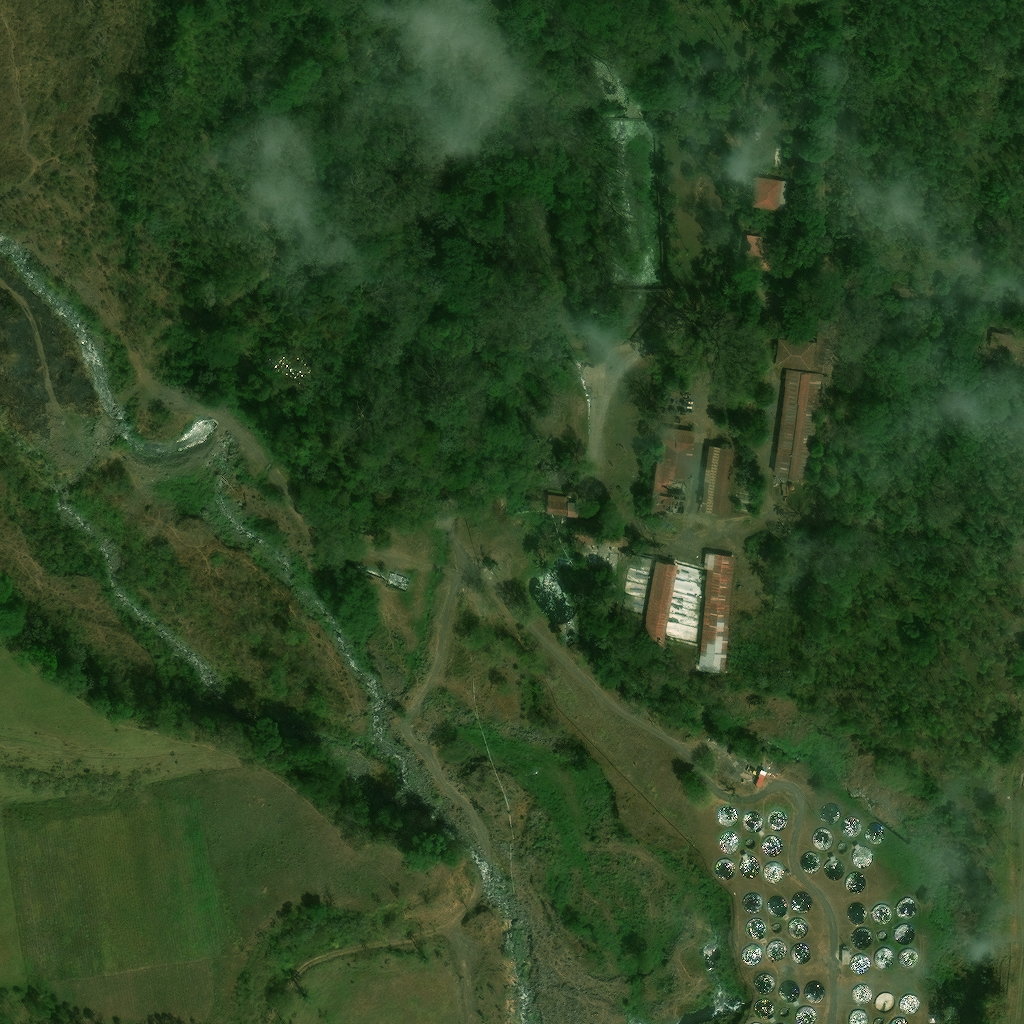

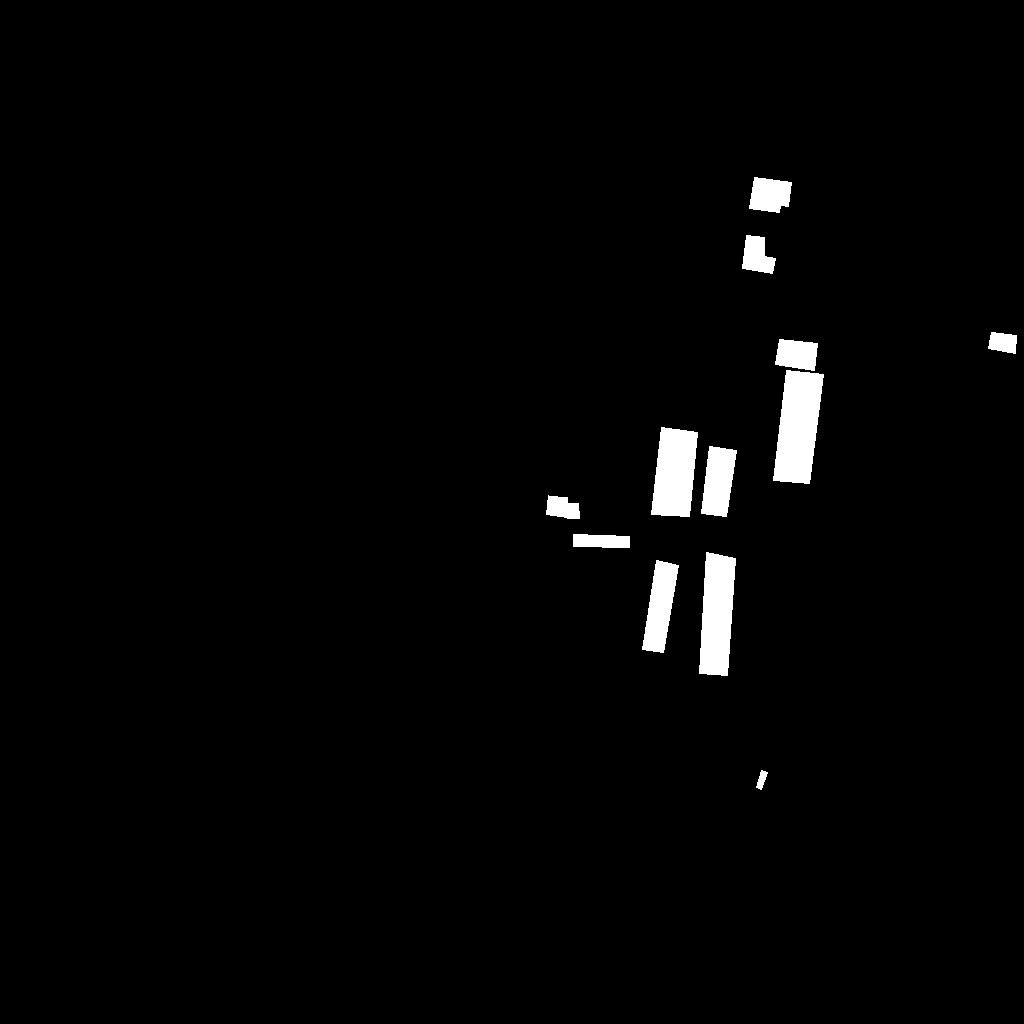

In [55]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL
from PIL import ImageOps

display(Image(filename=input_img_paths[7]))
img = ImageOps.autocontrast(load_img(target_img_paths[7]))
display(img)
# class0: black class1: white

## 데이터 전처리

In [78]:
from tensorflow import keras

class xBD(keras.utils.Sequence):
  def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
    self.batch_size = batch_size
    self.img_size = img_size
    self.input_img_paths = input_img_paths
    self.target_img_paths = target_img_paths

  def __len__(self):
    return len(self.target_img_paths) // self.batch_size

  def __getitem__(self, idx):
    i = idx * self.batch_size
    batch_input_img_paths = self.input_img_paths[i:i+self.batch_size]
    batch_target_img_paths = self.target_img_paths[i:i+self.batch_size]
    x = np.zeros((self.batch_size, ) + self.img_size + (3, ), dtype='float32')
    for j, path in enumerate(batch_input_img_paths):
      img = load_img(path, target_size=self.img_size)
      x[j] = img
    y = np.zeros((self.batch_size, ) + self.img_size + (1, ), dtype='uint8')
    for j, path in enumerate(batch_target_img_paths):
      img = load_img(path, target_size=self.img_size, color_mode='grayscale')
      y[j] = np.expand_dims(img, 2)

    return x, y


## 모델 구성

In [58]:
from tensorflow.keras import layers, models

def get_model(img_size, num_classes):
    inputs = layers.Input(shape=img_size + (3,))

    x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.20)(x)  # Dropout 추가

    previous_block_activation = x

    for filters in [ 128,256,512]:
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
        x = layers.Dropout(0.4)(x)  # Dropout 추가

        residual = layers.Conv2D(filters, 1, strides=2, padding='same')(previous_block_activation)
        x = layers.add([x, residual])
        previous_block_activation = x

    for filters in [512,256, 128,64]:
        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.UpSampling2D(2)(x)
        x = layers.Dropout(0.4)(x)  # Dropout 추가

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding='same')(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(num_classes, 3, activation='sigmoid', padding='same')(x)

    model = models.Model(inputs, outputs)
    return model

In [59]:
import random

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)

# K-fold

아래의 코드를 실행하세요!

In [60]:
# KFold 설정
num_folds = 28 # 예시 5
epochs_per_fold = 20  # 각 fold마다 수행할 에폭 수

## 모델 컴파일 및 학습



In [62]:
print(len(input_img_paths))
print(len(target_img_paths))

# 배열을 num_folds분할
input_splits = np.array_split(input_img_paths, num_folds)
target_splits = np.array_split(target_img_paths, num_folds)


# 검증용과 훈련용 데이터셋을 나누는 함수
def create_kfold_sets(input_splits, target_splits):
    validation_sets = []
    train_input_sets = []
    train_target_sets = []

    for i in range(num_folds):
        val_input = input_splits[i]
        val_target = target_splits[i]
        train_input = np.concatenate([input_splits[j] for j in range(num_folds) if j != i])
        train_target = np.concatenate([target_splits[j] for j in range(num_folds) if j != i])

        validation_sets.append((val_input, val_target))
        train_input_sets.append(train_input)
        train_target_sets.append(train_target)

    return validation_sets, train_input_sets, train_target_sets

# 검증용과 훈련용 데이터셋 생성
validation_sets, train_input_sets, train_target_sets = create_kfold_sets(input_splits, target_splits)

# 결과 출력
for i in range(num_folds):
    print(f"Fold {i+1}:")
    print(f"Validation Set - Input: {len(validation_sets[i][0])}, Target: {len(validation_sets[i][1])}")
    print(f"Train Set - Input: {len(train_input_sets[i])}, Target: {len(train_target_sets[i])}")
    print(f"First Validation Input: {validation_sets[i][0][0]}")
    print(f"First Validation Target: {validation_sets[i][1][0]}")
    print()

2799
2799
Fold 1:
Validation Set - Input: 100, Target: 100
Train Set - Input: 2699, Target: 2699
First Validation Input: ./image_origin/train/images\santa-rosa-wildfire_00000253_pre_disaster.png
First Validation Target: ./image_origin/train/targets\santa-rosa-wildfire_00000253_pre_disaster_target.png

Fold 2:
Validation Set - Input: 100, Target: 100
Train Set - Input: 2699, Target: 2699
First Validation Input: ./image_origin/train/images\santa-rosa-wildfire_00000277_pre_disaster.png
First Validation Target: ./image_origin/train/targets\santa-rosa-wildfire_00000277_pre_disaster_target.png

Fold 3:
Validation Set - Input: 100, Target: 100
Train Set - Input: 2699, Target: 2699
First Validation Input: ./image_origin/train/images\palu-tsunami_00000047_pre_disaster.png
First Validation Target: ./image_origin/train/targets\palu-tsunami_00000047_pre_disaster_target.png

Fold 4:
Validation Set - Input: 100, Target: 100
Train Set - Input: 2699, Target: 2699
First Validation Input: ./image_origin

# 경로설정

In [63]:
# 경로 설정
checkpoint_dir = "./checkpoint_dir" #.h5파일 담을 폴더 설정
history_dir = "./history_dir" # history 파일 담을 폴더 설정
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)

In [64]:
# 모델 파일 경로 및 초기 에포크와 최소 val_loss 설정
model_path = f"{checkpoint_dir}/model_epoch_401.h5"
initial_epoch = 0  # 사용자가 직접 지정
last_val_loss = 1 # 사용자가 직접 지정

In [65]:
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.models import load_model

# 모델 로드
if os.path.exists(model_path):
    best_model = load_model(model_path)
else:
    best_model = get_model(img_size, num_classes)
    best_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    initial_epoch = 0
    last_val_loss = np.inf  # 초기값 설정

# CSV 파일 이름 생성
history_file = os.path.join(history_dir, 'training_history.csv')

# CSVLogger 설정 (새로운 파일 생성)
csv_logger = CSVLogger(history_file, append=True)

best_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_30       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 64, 64,    │          0 │ activation_30[0]… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_31       │ (None, 64, 64,    │          0 │ dropout_16[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_12 │ (None, 64, 64,    │      4,512 │ activation_31[0]… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_13 │ (None, 64, 64,    │     17,664 │ activation_32[0]… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32, 32,    │          0 │ max_pooling2d_6[… │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 32, 32,    │      4,224 │ dropout_16[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 32, 32,    │          0 │ dropout_17[0][0], │
│                     │ 128)              │            │ conv2d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_33       │ (None, 32, 32,    │          0 │ add_14[0][0]      │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_14 │ (None, 32, 32,    │     34,176 │ activation_33[0]

 Total params: 8,188,961 (31.24 MB)

 Trainable params: 8,181,473 (31.21 MB)

 Non-trainable params: 7,488 (29.25 KB)

In [66]:
# 학습 설정
# total_epochs = epochs_per_fold * num_folds
total_epochs = 2

In [67]:
# 데이터셋 분할 및 학습
for epoch in range(initial_epoch, total_epochs):
    fold = epoch % num_folds

    train_gen = xBD(batch_size, img_size, train_input_sets[fold], train_target_sets[fold])
    val_gen = xBD(batch_size, img_size, validation_sets[fold][0], validation_sets[fold][1])

    print(f"Epoch {epoch}/{total_epochs}")
    history = best_model.fit(train_gen, validation_data=val_gen, initial_epoch=epoch, epochs=epoch+1, verbose=1, callbacks=[csv_logger])
    # 손실 및 정확도 출력
    train_loss = history.history['loss'][0]
    train_acc = history.history['accuracy'][0]
    val_loss = history.history['val_loss'][0]
    val_acc = history.history['val_accuracy'][0]

    # 결과를 명확히 출력
    print(f"- loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}")

    # val_loss가 최소일때마다 저장하기
    current_val_loss = history.history['val_loss'][0]
    if current_val_loss < last_val_loss:
      last_val_loss = current_val_loss
      model_filename = os.path.join(checkpoint_dir, f'model_epoch_{epoch}.h5')
      best_model.save(model_filename)
      print(f"val_loss improved to {current_val_loss:.4f}, saving model to {model_filename}")



Epoch 0/2
337/337 ━━━━━━━━━━━━━━━━━━━━ 159s 451ms/step - accuracy: 0.8716 - loss: 1.0741 - val_accuracy: 0.9454 - val_loss: 0.2043


- loss: 0.4687 - accuracy: 0.9031 - val_loss: 0.2043 - val_accuracy: 0.9454
val_loss improved to 0.2043, saving model to ./checkpoint_dir\model_epoch_0.h5
Epoch 1/2
Epoch 2/2
337/337 ━━━━━━━━━━━━━━━━━━━━ 122s 358ms/step - accuracy: 0.9328 - loss: 0.2011 - val_accuracy: 0.9444 - val_loss: 0.1564


- loss: 0.1915 - accuracy: 0.9358 - val_loss: 0.1564 - val_accuracy: 0.9444
val_loss improved to 0.1564, saving model to ./checkpoint_dir\model_epoch_1.h5


In [68]:
! ls -al ./history_dir

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


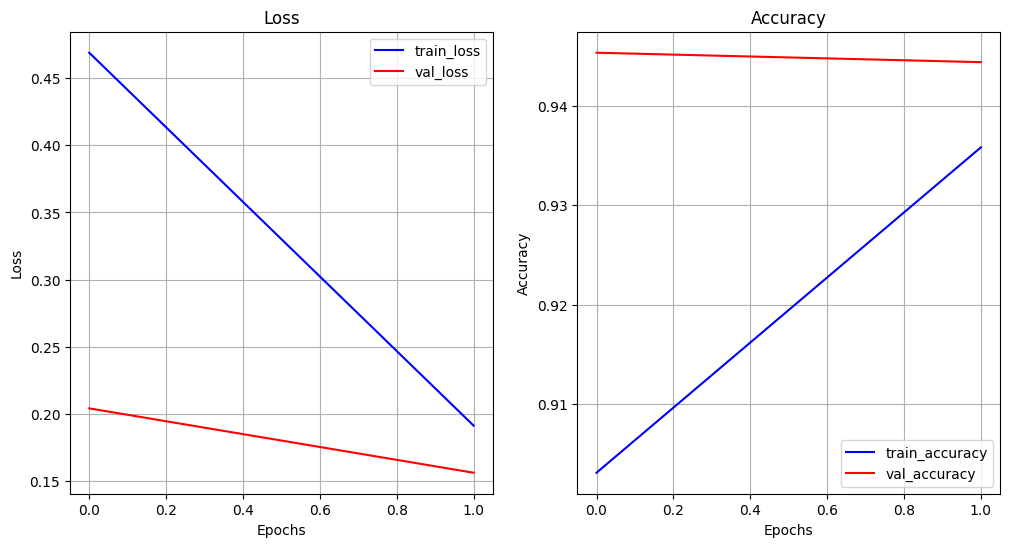

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = './history_dir/training_history.csv'
history_df = pd.read_csv(file_path)

# 학습 기록 그래프 출력 함수
def plot_history(df):
    plt.figure(figsize=(12, 6))

    # 손실 그래프
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['loss'], color='blue', label='train_loss')
    plt.plot(df['epoch'], df['val_loss'], color='red', label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['accuracy'], color='blue', label='train_accuracy')
    plt.plot(df['epoch'], df['val_accuracy'], color='red', label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.show()

# 그래프 출력
plot_history(history_df)

## 과소적합(Underfitting) / 과대적합(Overfitting)

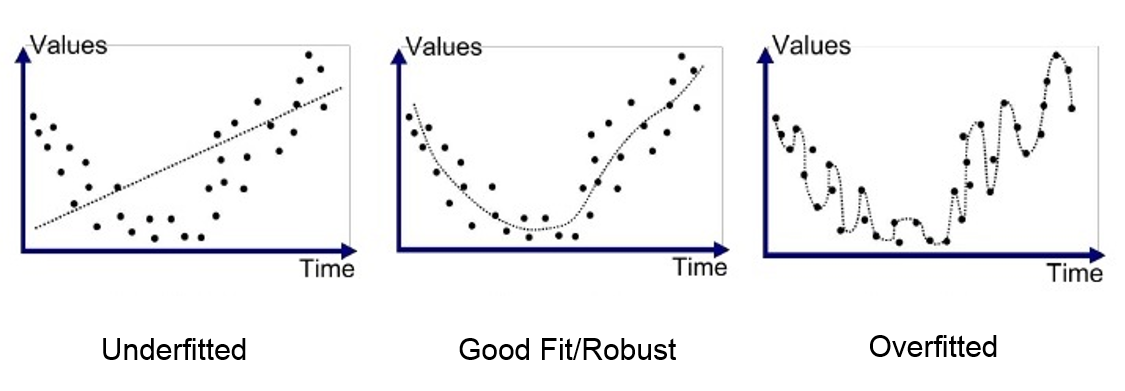

### 과소적합 (Underfitting)

- 학습 데이터를 충분히 학습하지 않아 성능이 매우 안 좋은 경우
- 모델이 지나치게 단순한 경우
- 해결 방안
  - 충분한 학습 데이터 수집
  - 보다 더 복잡한 모델 사용
  - 에폭수(epochs)를 늘려 충분히 학습

### 과대적합 (Overfitting)

- 모델이 학습 데이터에 지나치게 맞추어진 상태
- 새로운 데이터에서는 성능 저하
- 데이터에는 잡음이나 오류가 포함
- 학습 데이터가 매우 적을 경우
- 모델이 지나치게 복잡한 경우
- 학습 횟수가 매우 많을 경우
- 해결방안
  - 다양한 학습 데이터 수집 및 학습
  - 모델 단순화: 파라미터가 적은 모델을 선택하거나, 학습 데이터의 특성 수를 줄임
  - 정규화(Regularization)을 통한 규칙 단순화
  - 적정한 하이퍼 파라미터 찾기

### 과대적합(overfitting)과 과소적합(underfitting) 방지 방법

* 모델의 크기 축소
* 가중치 초기화(Weight Initializer)
* 옵티마이저(Optimizer)
* 배치 정규화(Batch Normalization)
* 규제화(Regularization)
* 드롭아웃(Dropout)

## 모델 평가 및 예측

In [83]:
from tensorflow.keras.models import load_model

# .h5 파일로부터 모델 로드
model = load_model('./checkpoint_dir/model_epoch_1.h5') # 적절하게 경로 변경하시면 됩니다.
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_30       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 64, 64,    │          0 │ activation_30[0]… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_31       │ (None, 64, 64,    │          0 │ dropout_16[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_12 │ (None, 64, 64,    │      4,512 │ activation_31[0]… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_13 │ (None, 64, 64,    │     17,664 │ activation_32[0]… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32, 32,    │          0 │ max_pooling2d_6[… │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 32, 32,    │      4,224 │ dropout_16[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 32, 32,    │          0 │ dropout_17[0][0], │
│                     │ 128)              │            │ conv2d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_33       │ (None, 32, 32,    │          0 │ add_14[0][0]      │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_14 │ (None, 32, 32,    │     34,176 │ activation_33[0]

 Total params: 8,188,963 (31.24 MB)

 Trainable params: 8,181,473 (31.21 MB)

 Non-trainable params: 7,488 (29.25 KB)

 Optimizer params: 2 (12.00 B)

In [71]:
!tar -xvf './test_images_labels_targets.tar' -C './images_test/'

tar: Error opening archive: Failed to open ''./test_images_labels_targets.tar''


In [88]:
input_dir = './image_test/test/images'
target_dir = './image_test/test/targets'
img_size = (128,128)
batch_size = 8

input_img_paths = sorted([ os.path.join(input_dir, fname)
                           for fname in os.listdir(input_dir)
                           if fname.endswith('pre_disaster.png')])

target_img_paths = sorted([ os.path.join(target_dir, fname)
                           for fname in os.listdir(target_dir)
                           if fname.endswith('pre_disaster_target.png')])

test_input_img_paths = input_img_paths
test_target_img_paths = target_img_paths

test_gen = xBD(batch_size, img_size, test_input_img_paths, test_target_img_paths)

In [89]:
model.evaluate(test_gen)

c:\Users\User\anaconda3\envs\sibas\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 34s 294ms/step - accuracy: 0.9388 - loss: 0.1651


[0.16082829236984253, 0.9404952526092529]

In [91]:
import math

# 추론용 데이터 제너레이터 클래스 정의
class xBDInference(keras.utils.Sequence):
    def __init__(self, batch_size, img_size, input_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths

    def __len__(self):
        return math.ceil(len(self.input_img_paths) / self.batch_size)

    def __getitem__(self, idx):
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i: i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype='float32')
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        return x


# 2. 테스트셋 이미지 모델 추론

In [92]:
test_gen = xBDInference(batch_size, img_size, test_input_img_paths)

test_preds = model.predict(test_gen)

117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step


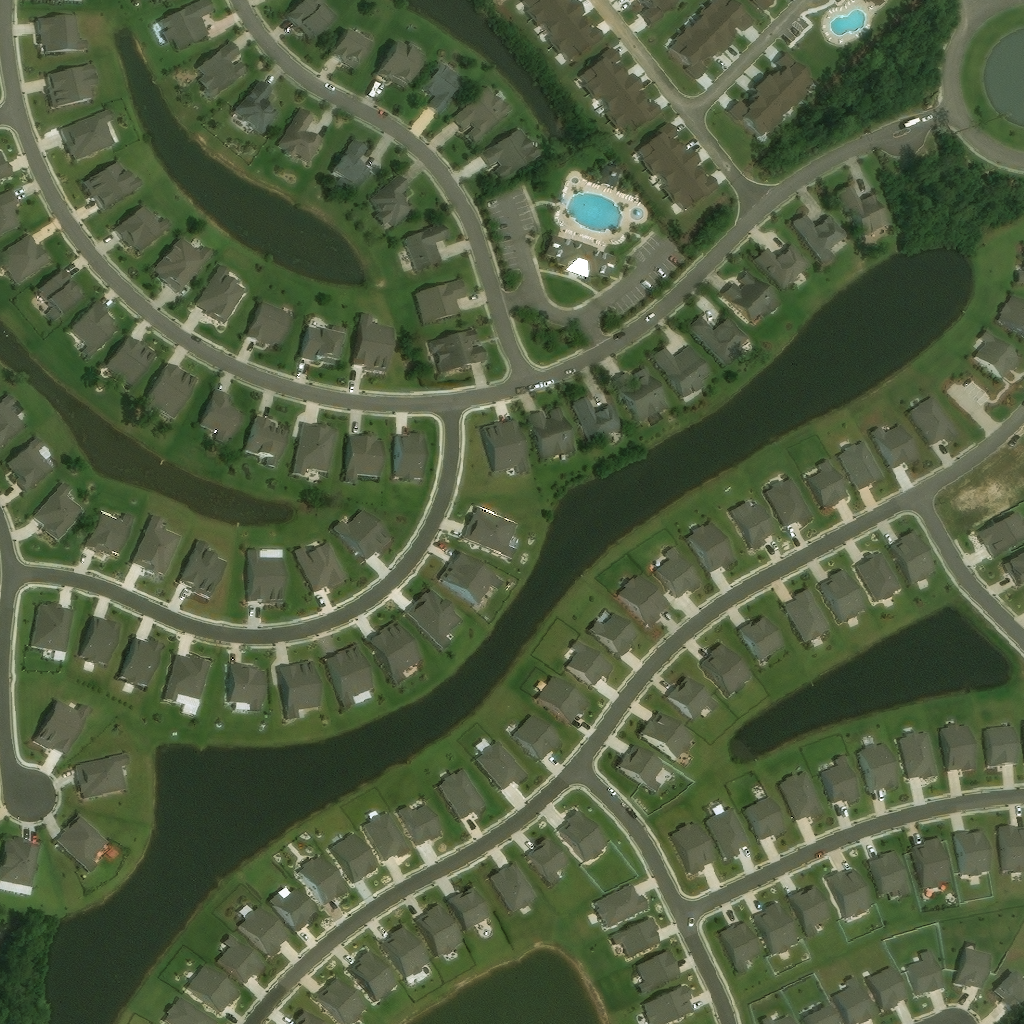

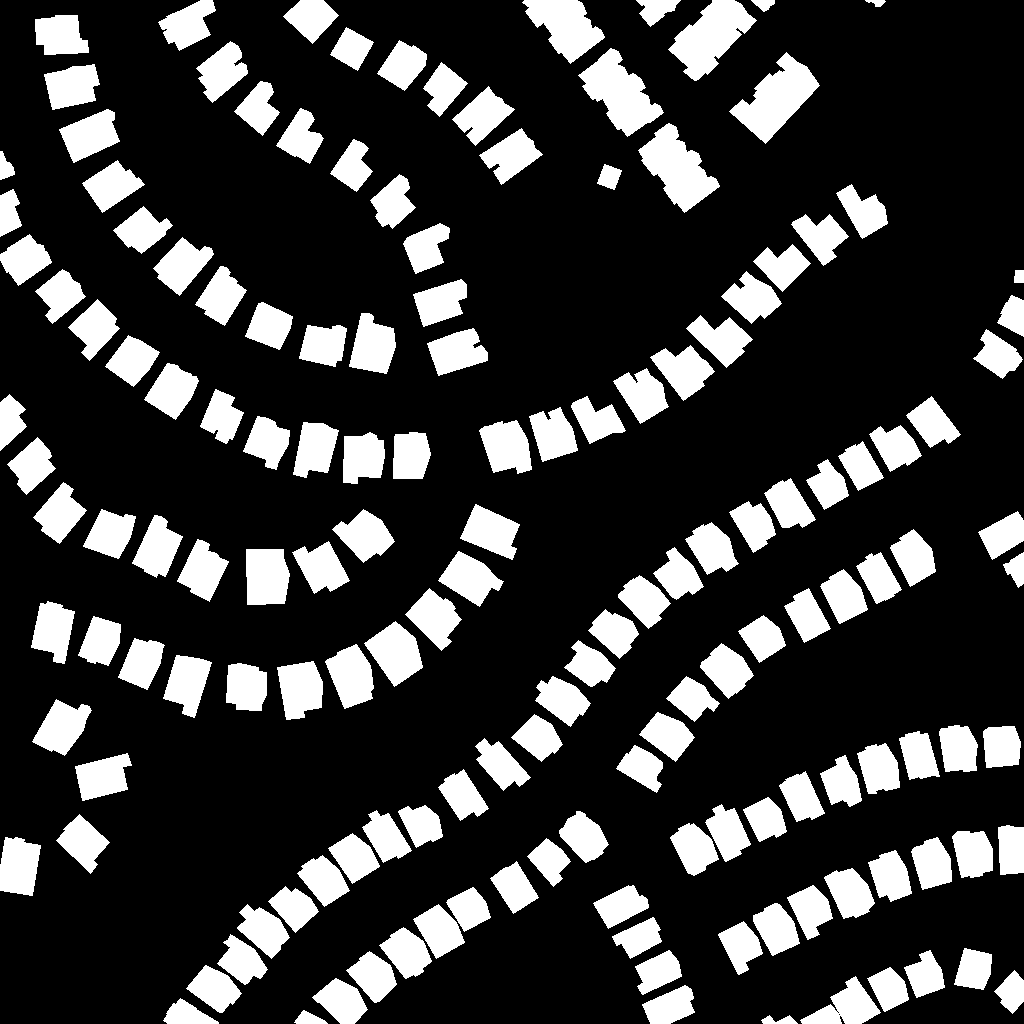

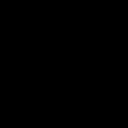

In [93]:
from tensorflow.keras.preprocessing.image import array_to_img

def display_mask(i):
  mask = test_preds[i] > 0.5 # sigmoid 사용시
  img = PIL.ImageOps.autocontrast(array_to_img(mask))
  display(img)

# 예측 결과 출력
i = 12

display(Image(filename=test_input_img_paths[i]))
img = ImageOps.autocontrast(load_img(test_target_img_paths[i]))
display(img)
display_mask(i)


## xBD 테스트셋 데이터 추론 마스크 결과 사진 저장

In [ ]:
# 저장할 폴더 경로
save_dir = "/content/drive/MyDrive/xBD/test_predicts_v8_1_0" # 경로 변경 필요
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


In [ ]:
def save_mask(i, input_img_paths, save_dir):
    # 입력 이미지 경로에서 파일 이름 추출
    original_filename = os.path.basename(input_img_paths[i])
    # 파일 확장자 제거
    filename_without_extension = os.path.splitext(original_filename)[0]

    # 추론한 마스크 생성
    mask = test_preds[i] > 0.5 # sigmoid 사용시
    img = ImageOps.autocontrast(array_to_img(mask))

    # 마스크를 저장할 파일 이름 설정 (원본 파일 이름에 '_mask' 추가)
    save_path = os.path.join(save_dir, f"{filename_without_extension}_mask.png")

    # 생성된 마스크를 지정된 폴더에 저장
    img.save(save_path)

    print(f"Mask saved at: {save_path}")

In [ ]:
# test_preds에 저장된 모든 마스크에 대해 save_mask 함수를 호출하여 저장
for i in range(len(test_preds)):
    save_mask(i, test_input_img_paths, save_dir)

# MIOU 평가 (xBD test Data)



In [ ]:
y_true_arrays = [load_img(path, target_size=img_size, color_mode='grayscale') for path in test_target_img_paths]
y_true = np.array([np.expand_dims(np.array(img), axis=-1) for img in y_true_arrays])
y_true = y_true.squeeze() # 필요시 차원 축소
# 예측 레이블 준비

# 예측 확률이 0.5 이상인 경우 1로, 그렇지 않으면 0으로 설정
y_pred = (test_preds.squeeze() > 0.5).astype(int)  # 예측 결과 이진화
#y_pred = np.argmax(test_preds, axis=-1)

# mIoU 계산
def mean_iou(y_true, y_pred, num_classes):
  intersection = np.zeros(num_classes)
  union = np.zeros(num_classes)
  for i in range(num_classes):
    intersection[i] = np.logical_and(y_true == i, y_pred == i).sum()
    union[i] = np.logical_or(y_true == i, y_pred == i).sum()
  iou = intersection / np.maximum(union, 1)
  mIoU = np.mean(iou)
  return mIoU

miou_score = mean_iou(y_true, y_pred, num_classes)
print("Mean IoU for the test set is:", miou_score)

Mean IoU for the test set is: 0.9804949783548398


# F1 스코어

In [ ]:
from sklearn.metrics import f1_score

# 예측 레이블 준비 (이진 분류의 경우)
y_true_arrays = [load_img(path, target_size=img_size, color_mode='grayscale') for path in test_target_img_paths]
y_true = np.array([np.expand_dims(np.array(img), axis=-1) for img in y_true_arrays])
y_true = y_true.squeeze()  # 차원 축소, 결과는 0과 1의 레이블

# 예측 확률이 0.5 이상인 경우 1로, 그렇지 않으면 0으로 설정
y_pred = (test_preds.squeeze() > 0.5).astype(int)  # 예측 결과 이진화

# F1 스코어 계산
f1 = f1_score(y_true.flatten(), y_pred.flatten(), average='binary')  # 이진 분류

print("F1 Score for the test set is:", f1)


F1 Score for the test set is: 0.8360603567691387


# 결과

### accuracy: 96.92%
### MIOU: 96.80
### F1 Score: 0.705

#DAICON 데이터셋

In [ ]:
!unzip -q "/content/drive/MyDrive/open.zip"

In [ ]:
from tensorflow.keras.models import load_model

# .h5 파일로부터 모델 로드
model = load_model('/content/drive/MyDrive/실험/model/model_epoch_452.h5')
model.summary()

In [ ]:
input_dir = '/content/test_img'
img_size = (224, 224)
batch_size = 1

input_img_paths = sorted([
    os.path.join(input_dir, fname)
    for fname in os.listdir(input_dir)
])

test_input_img_paths = input_img_paths[:5000]


In [ ]:
test_gen = xBDInference(batch_size, img_size, test_input_img_paths)

test_preds = model.predict(test_gen)

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

def display_mask(i):
  mask = test_preds[i] > 0.5 # sigmoid 사용시
  img = PIL.ImageOps.autocontrast(array_to_img(mask))
  display(img)

# 예측 결과 출력
i = 930

display(Image(filename=test_input_img_paths[i]))
display_mask(i)
